<a href="https://colab.research.google.com/github/leejyy/Assignment/blob/master/911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. the instructor will provide a rnage of questions to answer and you should use your knowledge to complte them as a team.

Team Members:Jiayang Li, Qiyu LIu, Ilya Golovin, Sukhyang Jeong

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import folium
import seaborn as sns
sns.set()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/911/data/911.csv')

In [14]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


How many unique zip codes are there?

According to the output,  there are 104 unique zip codes.

In [15]:
data['zip'].nunique()

#According to the output,  there are 104 unique zip codes.

104

How many calls at the same time?

According to the output,  the result is shown below.

In [16]:
data['timeStamp'].value_counts().head(10)

#According to the output,  the result is shown below.

2015-12-10 17:40:01    8
2016-04-21 17:57:01    7
2015-12-23 14:12:01    7
2016-07-31 07:17:01    6
2016-04-06 17:17:01    6
2016-03-21 09:02:00    6
2016-03-09 19:07:01    6
2016-04-03 09:52:02    6
2016-02-02 07:22:02    6
2016-05-01 11:27:01    6
Name: timeStamp, dtype: int64

What are the top 10 most common title? 

According to the output,  the top 10 most common title are Traffic: VEHICLE ACCIDENT, Traffic: DISABLED VEHICLE, Fire: FIRE ALARM, EMS: RESPIRATORY EMERGENCY, EMS: CARDIAC EMERGENCY, EMS: FALL VICTIM, EMS: VEHICLE ACCIDENT,Traffic: ROAD OBSTRUCTION, EMS: SUBJECT IN PAIN, EMS: HEAD INJURY.

In [17]:
 data['title'].value_counts().head(10)

#According to the output,  the top 10 most common title are Traffic: VEHICLE ACCIDENT, Traffic: DISABLED VEHICLE,
# Fire: FIRE ALARM, EMS: RESPIRATORY EMERGENCY, EMS: CARDIAC EMERGENCY, EMS: FALL VICTIM, EMS: VEHICLE ACCIDENT, 
#Traffic: ROAD OBSTRUCTION, EMS: SUBJECT IN PAIN, EMS: HEAD INJURY.

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

What is the address on zip code?

According to the output, if user enter the zip code: 19446, the addresses are shown below.

In [31]:
zip_code=int (input("Enter zip code :"))
address=data[data['zip']==zip_code]['addr']
print(address)

#According to the output, if user enter the zip code: 19446, the addresses are shown below.

Enter zip code :19525
0                 REINDEER CT & DEAD END
17               CHARLOTTE ST & MILES RD
33                                   NaN
53       WILSON AVE & E PHILADELPHIA AVE
82                 SWAMP PIKE & ROMIG RD
                      ...               
98552             SANATOGA RD & CROSS RD
98569            BIG RD & N CHARLOTTE ST
98606              LEIDY RD & CHARLES DR
98690             BROAD ST & BARTMAN AVE
99268           INDUSTRIAL DR & HOLLY RD
Name: addr, Length: 965, dtype: object


How many missing values in zip column?

According to the output, the number of missing values in zip column are 12855.

In [19]:
missing_values = ["n/a","na","--","NaN"]
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projects/911/data/911.csv",na_values = missing_values)
data['zip'].fillna(00000,inplace = True)


In [ ]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [30]:
data['zip'].value_counts().head(1)

#According to the output, the number of missing values in zip column are 12855.

0.0    12855
Name: zip, dtype: int64

What is the most common Reason for a 911 call based off of this new column?

According to the chart, EMS is most common reason for a 911 call.

In [25]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [26]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

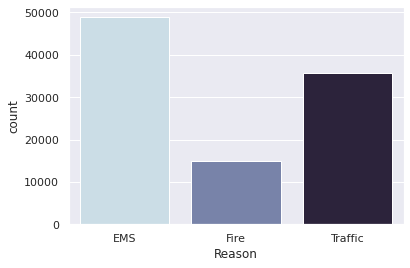

In [29]:
sns.countplot(x='Reason',data=data,palette="ch:s=.25,rot=-.25")